<a href="https://colab.research.google.com/github/GuysBarash/PoliticalShapley/blob/main/Israeli_politics_shapley.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data

Mandats per party

In [10]:
prty = dict()
prty['likud'] = 29
prty['new_hope'] = 14
prty['yamina'] = 13
prty['yesh_atid'] = 18
prty['meshutefet'] = 9
prty['shas'] = 8
prty['yahadut_ha_tora'] = 7
prty['israel_beitenu'] = 6
prty['tzionot_datit'] = 5
# prty['meretz'] = 0
prty['avoda'] = 7
prty['kahol_lavan'] = 4

Who won't sit with who (order doesnt matter)

In [11]:
disagree = dict()
disagree['likud'] = ['new_hope', 'kahol_lavan', 'israel_beitenu', 'yesh_atid', 'avoda']
disagree['meshutefet'] = ['likud', 'tzionot_datit', 'yamina']
disagree['yesh_atid'] = ['shas', 'yahadut_ha_tora']
disagree['yamina'] = ['likud', 'new_hope']

# Code

In [12]:
!git clone https://github.com/GuysBarash/PoliticalShapley.git

fatal: destination path 'PoliticalShapley' already exists and is not an empty directory.


In [13]:
from PoliticalShapley.PoliticalShapley import PoliticalShapley
from IPython.display import display
import pandas as pd
import matplotlib.pyplot as plt
#include if using a jupyter notebook, remove if using a .py file
%matplotlib inline 

In [14]:
shap = PoliticalShapley()
shap.add_parties(prty)
shap.add_restrictions(disagree)
shap.run()

# possible coalitions

In [15]:
df = shap.get_possible_govt()
if df.shape[0] > 0:
  display(df)
else:
  print("No possible coalition.")

No possible coalition.


# Shapley power

,Shapley
kahol_lavan,0.0
avoda,0.0
tzionot_datit,0.0
israel_beitenu,0.0
yahadut_ha_tora,0.0
shas,0.0
meshutefet,0.0
yesh_atid,0.0
yamina,0.0
new_hope,0.0


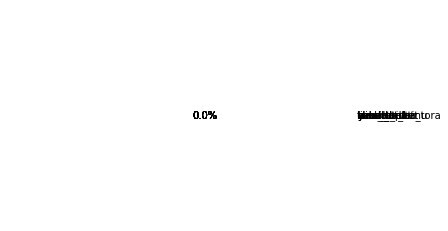

In [16]:
df = shap.get_shapley()
df = (df/df.sum()).fillna(0)
df.name='Shapley'
display(df.to_frame())

fig, ax = plt.subplots()
ax.pie(df.values, labels=df.index, autopct='%1.1f%%')
ax.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
ax.set_title('')
plt.show()